In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Question 1

Text(0.5, 1.0, 'Intensity Transformed')

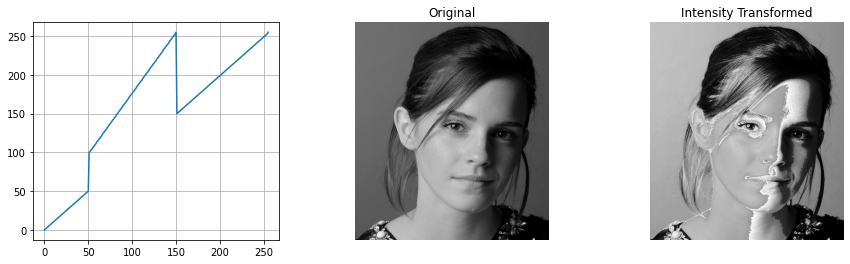

In [2]:
f = cv.imread(r'emma_gray.jpg')
assert f is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)
t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig,ax = plt.subplots(1,3)
fig.set_figwidth(15)

g = cv.LUT(f,t)
ax[1].axis('off')
ax[2].axis('off')
ax[0].grid()
ax[0].plot(t)
ax[1].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title("Original")
ax[2].set_title("Intensity Transformed")

Question 2

Text(0.5, 1.0, 'Gray Matter')

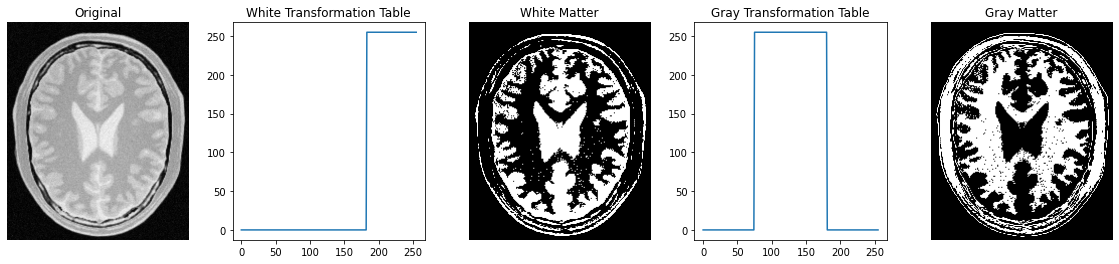

In [3]:
brain = cv.imread(r'brain_proton_density_slice.png')
assert brain is not None

#for i in range(175,185):
#    w1 = np.zeros(i)
#    w2 = 255*np.ones(256-i)
#    w = np.concatenate((w1,w2),axis=0).astype(np.uint8)
#    fig,ax = plt.subplots(1,2)
#    fig.set_figwidth(25)
#    g = cv.LUT(brain,w)
#    ax[0].grid()
#    ax[0].plot(w)
#    ax[0].set_title(str(i))
#    ax[0].imshow(cv.cvtColor(brain, cv.COLOR_BGR2RGB))
#    ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))


#for i in range(70,80):
#    g1 = np.zeros(i)
#    g2 = 255*np.ones(256-2*i)
#    g3 = np.zeros(i)
#    g = np.concatenate((g1,g2,g3),axis=0).astype(np.uint8)
#    fig,ax = plt.subplots(1,2)
#    fig.set_figwidth(25)
#   gm = cv.LUT(brain,g)
#    ax[0].plot(g)
#    ax[0].set_title(str(i))
#    ax[0].imshow(cv.cvtColor(brain, cv.COLOR_BGR2RGB))
#    ax[1].imshow(cv.cvtColor(gm, cv.COLOR_BGR2RGB))

ideal_val_w = 183
w1 = np.zeros(ideal_val_w)
w2 = 255*np.ones(256-ideal_val_w)
w = np.concatenate((w1,w2),axis=0).astype(np.uint8)
int_w = cv.LUT(brain,w)

ideal_val_g = 75
g1 = np.zeros(ideal_val_g)
g2 = 255*np.ones(256-2*ideal_val_g)
g3 = np.zeros(ideal_val_g)
g = np.concatenate((g1,g2,g3),axis=0).astype(np.uint8)
int_g = cv.LUT(brain,g)

fig,ax = plt.subplots(1,5)
fig.set_figwidth(20)

ax[0].imshow(cv.cvtColor(brain, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(int_w, cv.COLOR_BGR2RGB))
ax[4].imshow(cv.cvtColor(int_g, cv.COLOR_BGR2RGB))
ax[1].plot(w)
ax[3].plot(g)

ax[0].axis('off')
ax[2].axis('off')
ax[4].axis('off')

ax[0].set_title("Original")
ax[1].set_title("White Transformation Table")
ax[2].set_title("White Matter")
ax[3].set_title("Gray Transformation Table")
ax[4].set_title("Gray Matter")

Question 3

Text(0.5, 1.0, 'Final')

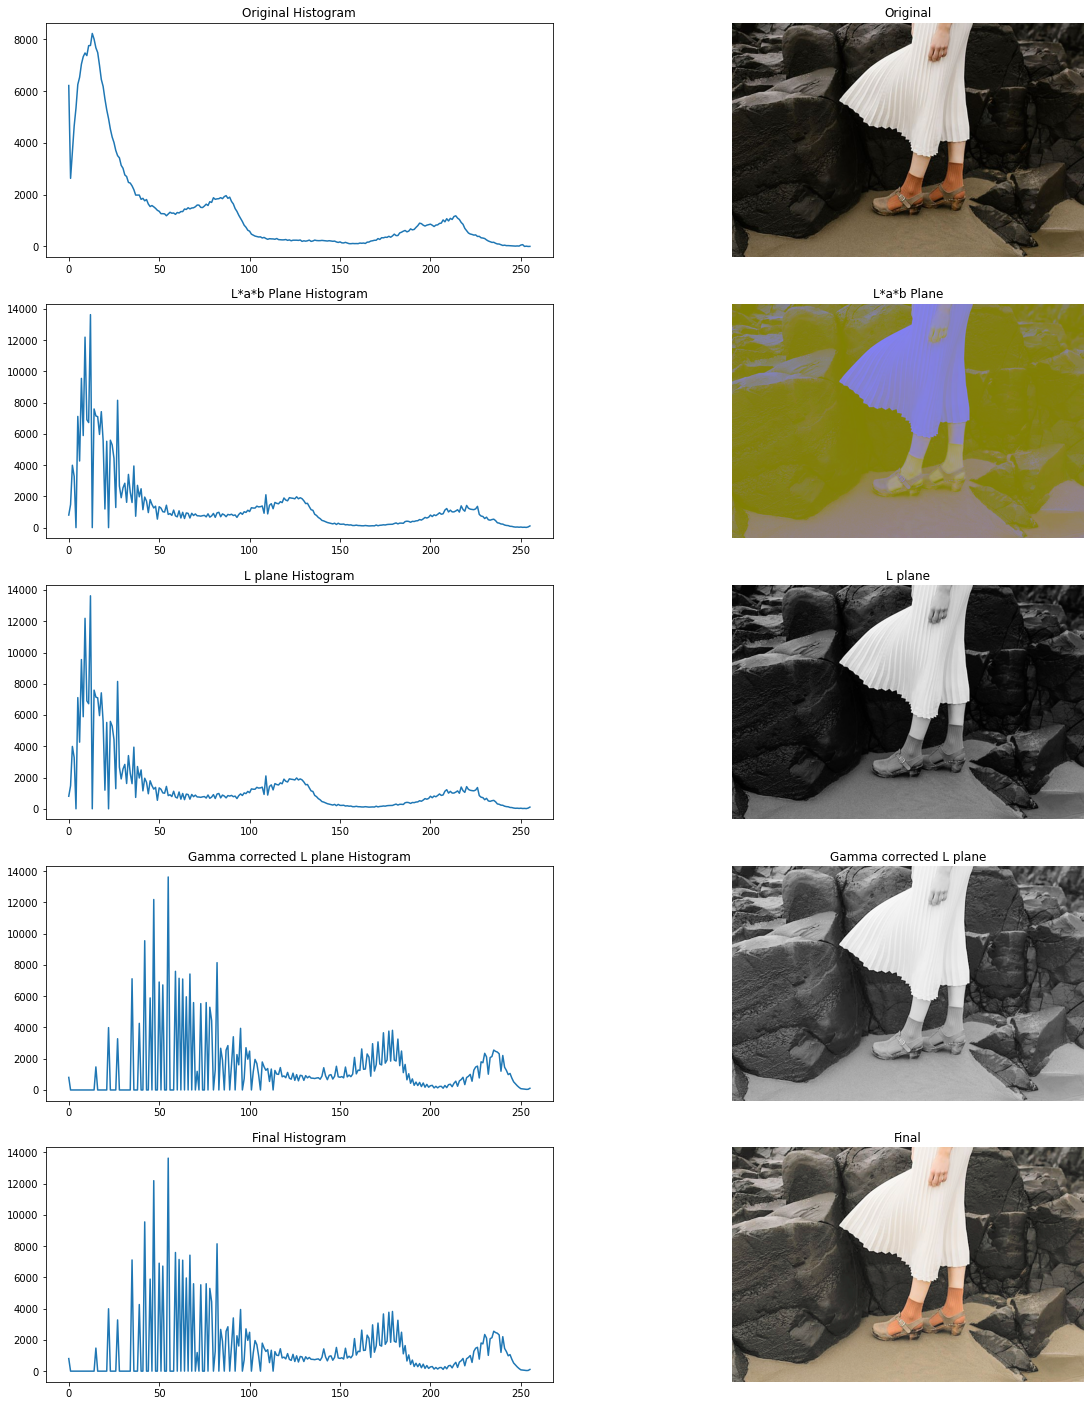

In [87]:
img = cv.imread(r'highlights_and_shadows.jpg')
assert img is not None

img_con = cv.cvtColor(img, cv.COLOR_BGR2LAB)
(L,A,B) = cv.split(img_con)
 
gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range (0,256)]).astype(np.uint8)
gam = cv.LUT(L,t)

final = cv.merge([gam,A,B])

fig,ax1 = plt.subplots(5,2)

fig.set_figheight(25)
fig.set_figwidth(20)

for i in range(5):
    ax1[i][1].axis('off')

ax1[0][0].plot(cv.calcHist([img],[0],None,[256],[0,256]))
ax1[1][0].plot(cv.calcHist([img_con],[0],None,[256],[0,256]))
ax1[2][0].plot(cv.calcHist([L],[0],None,[256],[0,256]))
ax1[3][0].plot(cv.calcHist([gam],[0],None,[256],[0,256]))
ax1[4][0].plot(cv.calcHist([final],[0],None,[256],[0,256]))

ax1[0][0].set_title("Original Histogram")
ax1[1][0].set_title("L*a*b Plane Histogram")
ax1[2][0].set_title("L plane Histogram")
ax1[3][0].set_title("Gamma corrected L plane Histogram")
ax1[4][0].set_title("Final Histogram")
   
ax1[0][1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax1[1][1].imshow(cv.cvtColor(img_con, cv.COLOR_BGR2RGB))
ax1[2][1].imshow(cv.cvtColor(L, cv.COLOR_BGR2RGB))
ax1[3][1].imshow(cv.cvtColor(gam, cv.COLOR_BGR2RGB))
ax1[4][1].imshow(cv.cvtColor(final, cv.COLOR_LAB2RGB))

ax1[0][1].set_title("Original")
ax1[1][1].set_title("L*a*b Plane")
ax1[2][1].set_title("L plane")
ax1[3][1].set_title("Gamma corrected L plane")
ax1[4][1].set_title("Final")



Question 4

Text(0.5, 1.0, 'Histogram Equalized Image')

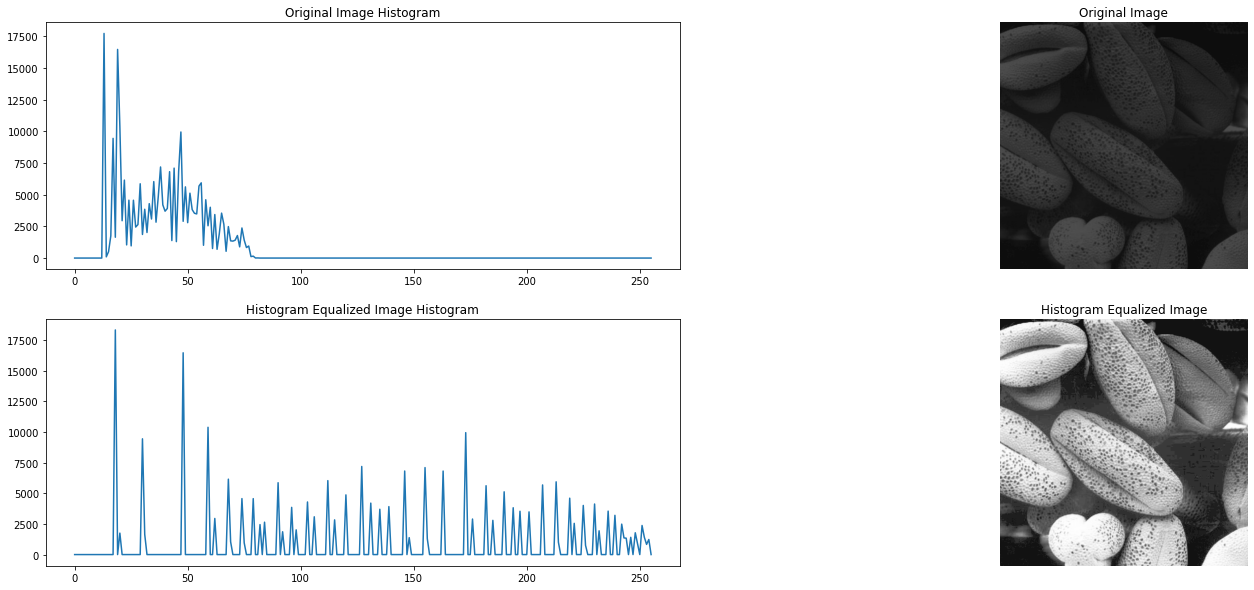

In [88]:
shell = cv.imread(r'shells.png')
assert shell is not None

def equalize_hist(Image):
    hist,bins = np.histogram(Image.ravel(),255,[0,255])
    cdf = hist.cumsum()
    cdf = 255*cdf/cdf[-1]
    cdf = cdf.astype(np.uint8)
    eq_img = cdf[Image]

    return eq_img

equ_image = equalize_hist(shell)

fig,ax1 = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(25)

for i in range(2):
    ax1[i][1].axis('off')

ax1[0][0].plot(cv.calcHist([shell],[0],None,[256],[0,256]))
ax1[1][0].plot(cv.calcHist([equ_image],[0],None,[256],[0,256]))

ax1[0][0].set_title("Original Image Histogram")
ax1[1][0].set_title("Histogram Equalized Image Histogram")

ax1[0][1].imshow(cv.cvtColor(shell, cv.COLOR_BGR2RGB))
ax1[1][1].imshow(cv.cvtColor(equ_image, cv.COLOR_BGR2RGB))

ax1[0][1].set_title("Original Image")
ax1[1][1].set_title("Histogram Equalized Image")

Question 5

Question 6 a)

(-0.5, 181.5, 189.5, -0.5)

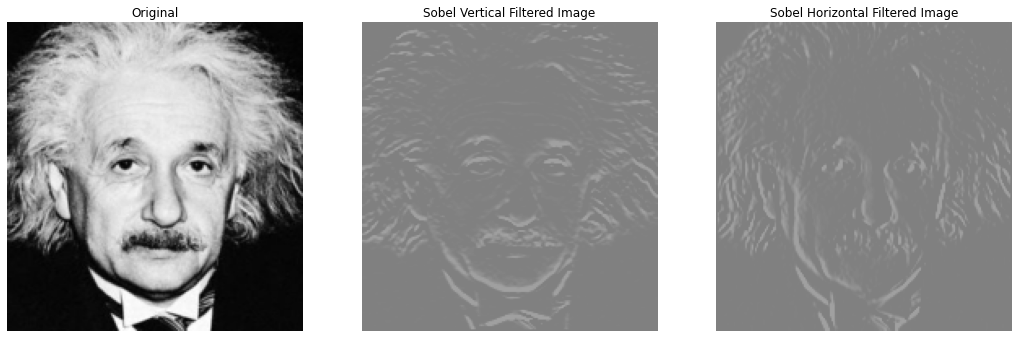

In [104]:
ein = cv.imread(r'einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert ein is not None

ker_sv = np.array([(1,2,1),(0,0,0),(-1,-2,-1)], dtype = 'float')
ker_sh = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float')
im_avg_sv = cv.filter2D(ein,-1,ker_sv)
im_avg_sh = cv.filter2D(ein,-1,ker_sh)

fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].set_title('Original')
ax[0].imshow(ein,cmap="gray")
ax[0].axis('off')
ax[1].set_title('Sobel Vertical Filtered Image')
ax[1].imshow(im_avg_sv,cmap="gray",vmin=-1020,vmax=1020)
ax[1].axis('off')
ax[2].set_title('Sobel Horizontal Filtered Image')
ax[2].imshow(im_avg_sh,cmap="gray",vmin=-1020,vmax=1020)
ax[2].axis('off')

Question 6 b) 

(-0.5, 181.5, 189.5, -0.5)

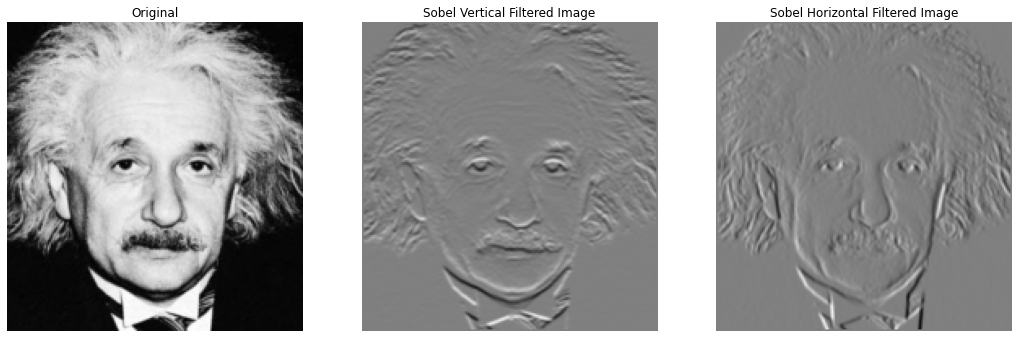

In [28]:
def sob_filter(image, array):
    blank_array = np.zeros((np.shape(image)[0],np.shape(image)[1]))
    for i in range(1,np.shape(image)[0]-1):
        for j in range(1,np.shape(image)[1]-1):
            blank_array[i][j] = array[0][0]*image[i-1][j-1]+array[0][1]*image[i-1][j]+array[0][2]*image[i-1][j+1]+array[1][0]*image[i][j-1]+array[1][1]*image[i][j]+array[1][2]*image[i][j+1]+array[2][0]*image[i+1][j-1]+array[2][1]*image[i+1][j]+array[2][2]*image[i+1][j+1]
    return blank_array

ein = cv.imread(r'einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
ker_sv = np.array([(1,2,1),(0,0,0),(-1,-2,-1)], dtype = 'float')
ker_sh = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype = 'float')
sobv_im = sob_filter(ein, ker_sv)
sobh_im = sob_filter(ein, ker_sh)

fig,ax=plt.subplots(1,3,figsize=(18,6))
ax[0].set_title('Original')
ax[0].imshow(ein,cmap="gray")
ax[0].axis('off')
ax[1].set_title('Sobel Vertical Filtered Image')
ax[1].imshow(sobv_im,cmap="gray",vmin=-1020,vmax=1020)
ax[1].axis('off')
ax[2].set_title('Sobel Horizontal Filtered Image')
ax[2].imshow(sobh_im,cmap="gray",vmin=-1020,vmax=1020)
ax[2].axis('off')

Question 6 c)